In [109]:
import pandas as pd
col_names = ['engine_id', 'cycle'] \
            + [f'setting_{i}' for i in range(1, 4)] \
            + [f'sensor_{i}' for i in range(1, 22)]

file_path = r"C:\Users\priyanka\Downloads\archive (2)\CMaps\test_FD002.txt"

df = pd.read_csv(file_path, 
                 sep=r"\s+", 
                 header=None, 
                 names=col_names)
df = df.dropna(axis=1, how='all')

output_csv = r"C:\Users\priyanka\Downloads\test_FD002.csv"
df.to_csv(output_csv, index=False)

print(f" Conversion complete. CSV saved at:\n{output_csv}")


 Conversion complete. CSV saved at:
C:\Users\priyanka\Downloads\test_FD002.csv


In [111]:
print(df.head())

   engine_id  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0          1      1     9.9987     0.2502      100.0    489.05    605.03   
1          1      2    20.0026     0.7000      100.0    491.19    607.82   
2          1      3    35.0045     0.8400      100.0    449.44    556.00   
3          1      4    42.0066     0.8410      100.0    445.00    550.17   
4          1      5    24.9985     0.6213       60.0    462.54    536.72   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1497.17   1304.99     10.52  ...     371.69    2388.18    8114.10   
1   1481.20   1246.11      9.35  ...     315.32    2388.12    8053.06   
2   1359.08   1128.36      5.48  ...     183.04    2387.75    8053.04   
3   1349.69   1127.89      3.91  ...     130.40    2387.72    8066.90   
4   1253.18   1050.69      7.05  ...     164.56    2028.05    7865.66   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.6476       0.03

In [9]:
df.count()

unit         33991
cycle        33991
setting_1    33991
setting_2    33991
setting_3    33991
s1           33991
s2           33991
s3           33991
s4           33991
s5           33991
s6           33991
s7           33991
s8           33991
s9           33991
s10          33991
s11          33991
s12          33991
s13          33991
s14          33991
s15          33991
s16          33991
s17          33991
s18          33991
s19          33991
s20          33991
s21          33991
dtype: int64

In [14]:
print(df.duplicated().sum())

0


In [18]:
print(df.isnull().sum())

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
dtype: int64


In [103]:

train_df = pd.read_csv(output_csv)
max_cycle = train_df.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id', 'max_cycle']
train_df = train_df.merge(max_cycle, on='engine_id', how='left')
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']
train_df = train_df.drop(columns=['max_cycle'])
print(train_df.head())


   engine_id  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0          1      1     9.9987     0.2502      100.0    489.05    605.03   
1          1      2    20.0026     0.7000      100.0    491.19    607.82   
2          1      3    35.0045     0.8400      100.0    449.44    556.00   
3          1      4    42.0066     0.8410      100.0    445.00    550.17   
4          1      5    24.9985     0.6213       60.0    462.54    536.72   

   sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  sensor_15  \
0   1497.17   1304.99     10.52  ...    2388.18    8114.10     8.6476   
1   1481.20   1246.11      9.35  ...    2388.12    8053.06     9.2405   
2   1359.08   1128.36      5.48  ...    2387.75    8053.04     9.3472   
3   1349.69   1127.89      3.91  ...    2387.72    8066.90     9.3961   
4   1253.18   1050.69      7.05  ...    2028.05    7865.66    10.8682   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.03        369      

In [107]:
rul_csv = r"C:\Users\priyanka\Downloads\train_FD002_with_RUL.csv"
train_df.to_csv(rul_csv, index=False)
print(f"Training data with RUL saved at: {rul_csv}")


Training data with RUL saved at: C:\Users\priyanka\Downloads\train_FD002_with_RUL.csv


In [32]:
from sklearn.preprocessing import StandardScaler

feature_cols = [col for col in train_df.columns if col not in ['engine_id', 'cycle', 'RUL']]
X = train_df[feature_cols]
y = train_df['RUL']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
train_scaled = pd.concat([train_df[['engine_id', 'cycle', 'RUL']], X_scaled_df], axis=1)
print(train_scaled.head())


   engine_id  cycle  RUL  setting_1  setting_2  setting_3  sensor_1  sensor_2  \
0          1      1  257  -0.945715  -1.032028   0.417335  0.609351  0.681291   
1          1      2  256  -0.268803   0.414305   0.417335  0.690245  0.756013   
2          1      3  255   0.746297   0.864476   0.417335 -0.887948 -0.631835   
3          1      4  254   1.220092   0.867691   0.417335 -1.055785 -0.787975   
4          1      5  253   0.069243   0.161245  -2.396158 -0.392755 -1.148194   

   sensor_3  sensor_4  ...  sensor_12  sensor_13  sensor_14  sensor_15  \
0  0.741741  0.856061  ...   0.761684   0.418209   0.601962  -0.893012   
1  0.591049  0.361427  ...   0.353510   0.417740  -0.126197  -0.099939   
2 -0.561270 -0.627755  ...  -0.604328   0.414847  -0.126436   0.042784   
3 -0.649874 -0.631704  ...  -0.985493   0.414612   0.038903   0.108194   
4 -1.560538 -1.280238  ...  -0.738141  -2.397802  -2.361732   2.077299   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21 

In [76]:
from sklearn.model_selection import train_test_split

# Split engines to avoid data leakage
engines = train_scaled['engine_id'].unique()
train_engines, val_engines = train_test_split(engines, test_size=0.2, random_state=42)

train_data = train_scaled[train_scaled['engine_id'].isin(train_engines)]
val_data = train_scaled[train_scaled['engine_id'].isin(val_engines)]

X_train = train_data[feature_cols]
y_train = train_data['RUL']

X_val = val_data[feature_cols]
y_val = val_data['RUL']

print(X_train.shape, X_val.shape)


(26904, 24) (7087, 24)


In [78]:
df

,unit,cycle,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [82]:
rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=None,      
    random_state=42,
    n_jobs=-1            
)


In [84]:
rf_model.fit(X_train, y_train)
print(" Random Forest model trained successfully!")


✅ Random Forest model trained successfully!


In [85]:
y_pred = rf_model.predict(X_val)


In [101]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse:.2f}")
rmse = np.sqrt(mse)
print(f" Validation RMSE: {rmse:.2f}")
r2 = r2_score(y_val, y_pred)
print(f" Validation R2 Score: {r2:.2f}")


MSE: 2805.42
✅ Validation RMSE: 52.97
✅ Validation R2 Score: 0.15


 Conversion complete. CSV saved at:
C:\Users\priyanka\Downloads\test_FD002.csv


C:\Users\priyanka\AppData\Local\Temp\ipykernel_4940\4192007774.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


 XGBoost model trained successfully!
 Validation MSE: 2805.42
 Validation RMSE: 52.97
 Validation R2 Score: 0.15


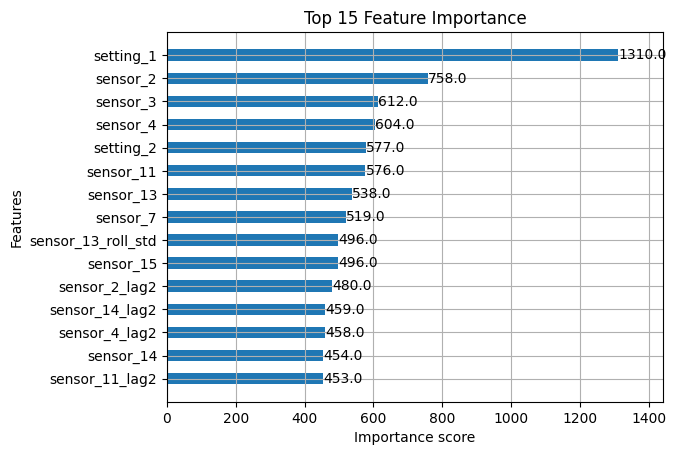

In [105]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
col_names = ['engine_id', 'cycle'] \
            + [f'setting_{i}' for i in range(1, 4)] \
            + [f'sensor_{i}' for i in range(1, 22)]

file_path = r"C:\Users\priyanka\Downloads\archive (2)\CMaps\test_FD002.txt"

df = pd.read_csv(file_path, 
                 sep=r"\s+", 
                 header=None, 
                 names=col_names)
df = df.dropna(axis=1, how='all')

output_csv = r"C:\Users\priyanka\Downloads\test_FD002.csv"
df.to_csv(output_csv, index=False)

print(f" Conversion complete. CSV saved at:\n{output_csv}")

max_cycle = df.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id', 'max_cycle']
df = df.merge(max_cycle, on='engine_id', how='left')
df['RUL'] = df['max_cycle'] - df['cycle']
df = df.drop(columns=['max_cycle'])
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]

for col in sensor_cols:
    df[f'{col}_roll_mean'] = df.groupby('engine_id')[col].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df[f'{col}_roll_std'] = df.groupby('engine_id')[col].transform(lambda x: x.rolling(5, min_periods=1).std())

for col in sensor_cols:
    df[f'{col}_lag1'] = df.groupby('engine_id')[col].shift(1)
    df[f'{col}_lag2'] = df.groupby('engine_id')[col].shift(2)

df.fillna(method='bfill', inplace=True)
feature_cols = [col for col in df.columns if col not in ['engine_id', 'cycle', 'RUL']]
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

engines = df['engine_id'].unique()
train_engines, val_engines = train_test_split(engines, test_size=0.2, random_state=42)

train_data = df[df['engine_id'].isin(train_engines)]
val_data = df[df['engine_id'].isin(val_engines)]

X_train = train_data[feature_cols]
y_train = train_data['RUL']
X_val = val_data[feature_cols]
y_val = val_data['RUL']
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
print(" XGBoost model trained successfully!")
y_pred = xgb_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f" Validation MSE: {mse:.2f}")
print(f" Validation RMSE: {rmse:.2f}")
print(f" Validation R2 Score: {r2:.2f}")
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='weight', height=0.5)
plt.title("Top 15 Feature Importance")
plt.show()


C:\Users\priyanka\AppData\Local\Temp\ipykernel_4940\2296340266.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


 XGBoost model trained successfully!
 Validation MSE: 2935.32
 Validation RMSE: 54.18
 Validation R2 Score: 0.11


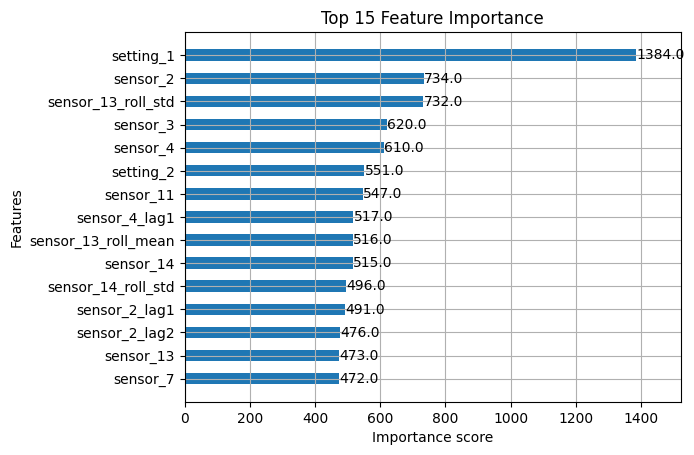

In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
col_names = ['engine_id', 'cycle'] \
            + [f'setting_{i}' for i in range(1, 4)] \
            + [f'sensor_{i}' for i in range(1, 22)]

file_path = r"C:\Users\priyanka\Downloads\archive (2)\CMaps\test_FD002.txt"

df = pd.read_csv(file_path, 
                 sep=r"\s+", 
                 header=None, 
                 names=col_names)
df = df.dropna(axis=1, how='all')

output_csv = r"C:\Users\priyanka\Downloads\test_FD002.csv"
df.to_csv(output_csv, index=False)
max_cycle = df.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id', 'max_cycle']
df = df.merge(max_cycle, on='engine_id', how='left')
df['RUL'] = df['max_cycle'] - df['cycle']
df = df.drop(columns=['max_cycle'])
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
Q1 = df[sensor_cols].quantile(0.25)
Q3 = df[sensor_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[sensor_cols] < (Q1 - 1.5*IQR)) | (df[sensor_cols] > (Q3 + 1.5*IQR))).any(axis=1)]
for col in sensor_cols:
    df[f'{col}_roll_mean'] = df.groupby('engine_id')[col].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df[f'{col}_roll_std'] = df.groupby('engine_id')[col].transform(lambda x: x.rolling(5, min_periods=1).std())
    df[f'{col}_lag1'] = df.groupby('engine_id')[col].shift(1)
    df[f'{col}_lag2'] = df.groupby('engine_id')[col].shift(2)
df.fillna(method='bfill', inplace=True)
feature_cols = [col for col in df.columns if col not in ['engine_id','cycle','RUL']]
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
engines = df['engine_id'].unique()
train_engines, val_engines = train_test_split(engines, test_size=0.2, random_state=42)

train_data = df[df['engine_id'].isin(train_engines)]
val_data = df[df['engine_id'].isin(val_engines)]

X_train = train_data[feature_cols]
y_train = train_data['RUL']
X_val = val_data[feature_cols]
y_val = val_data['RUL']
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
print(" XGBoost model trained successfully!")
y_pred = xgb_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f" Validation MSE: {mse:.2f}")
print(f" Validation RMSE: {rmse:.2f}")
print(f" Validation R2 Score: {r2:.2f}")
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='weight', height=0.5)
plt.title("Top 15 Feature Importance")
plt.show()


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression model trained successfully!")
y_pred_lr = lin_reg.predict(X_val)
mse = mean_squared_error(y_val, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_lr)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R2 Score: {r2:.2f}")


Linear Regression model trained successfully!
Validation MSE: 2759.16
Validation RMSE: 52.53
Validation R2 Score: 0.16
